In [85]:
# coding: UTF-8 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc  

In [86]:
# 准备数据
test_subset = pd.read_csv('raw/TestSubset.csv')
train_subset = pd.read_csv('raw/TrainingSubset.csv')

# 训练集
train = train_subset.drop(['EbayID','Price','SellerName','EndDay'],axis=1)
train_target = train_subset['Price']

scaler = MinMaxScaler()
train = scaler.fit_transform(train)
n_trainSamples, n_features = train.shape

In [87]:
# ploting example from scikit-learn
def plot_learning(clf,title):

    plt.figure()
    validationScore = []
    trainScore = []
    mini_batch = 500
    # define the shuffle index
    ind = list(range(n_trainSamples))
    random.shuffle(ind)

    for idx in range(int(np.ceil(n_trainSamples / mini_batch))):
        i=idx * mini_batch
        j=min((idx + 1) * mini_batch, n_trainSamples)
        x_batch = train[i:j]
        y_batch = train_target[i:j]

        if idx > 0:
            validationScore.append(clf.score(x_batch, y_batch))
        clf.partial_fit(x_batch, y_batch)
        if idx > 0:
            trainScore.append(clf.score(x_batch, y_batch))

    plt.plot(trainScore, label="train score")
    plt.plot(validationScore, label="validation socre")
    plt.xlabel("Mini_batch")
    plt.ylabel("Score")
    plt.legend(loc='best')
    plt.title(title)

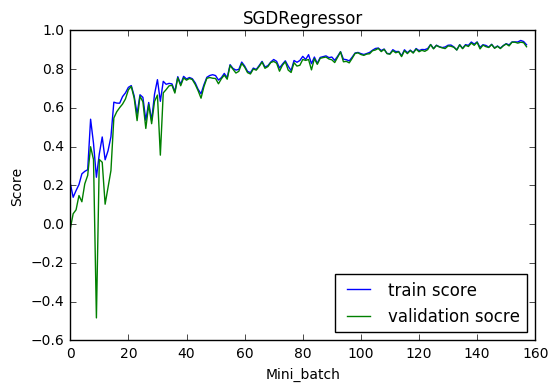

SGD regressor prediction result on testing data: 0.940
5     40.78
6     55.00
7     74.85
8     51.03
9     90.88
10    57.50
11    13.25
12    19.99
13     0.99
14    49.00
Name: Price, dtype: float64
[ 51.45646076  60.22148631  76.96759495  62.65779782  86.82794848
  62.04560134  24.11894174  25.8745761   -7.46167656  48.24919854]


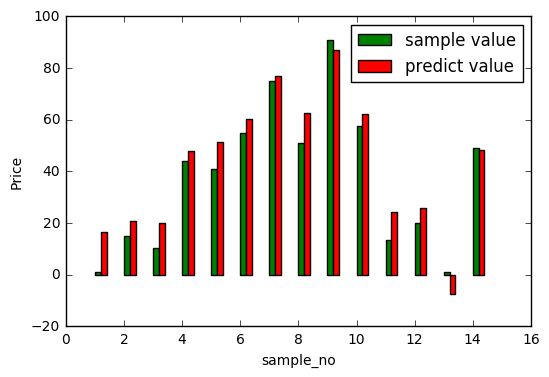

In [88]:
sgd_regresor = SGDRegressor(penalty='l2',alpha=0.0001)
plot_learning(sgd_regresor,"SGDRegressor")

# 准备测试集查看测试情况
test = test_subset.drop(['EbayID','Price','SellerName','EndDay'],axis=1)
test = scaler.fit_transform(test)
test_target = test_subset['Price']
plt.show()

print("SGD regressor prediction result on testing data: %.3f" % sgd_regresor.score(test,test_target))
print(test_target[5:15])
print(sgd_regresor.predict(test[5:15]))
x=range(1,15)
tx=[i+0.2 for i in x]
y=list(test_target.values[1:15])
plt.bar(x,y,0.2,color='green',label='sample value')
plt.bar(tx,sgd_regresor.predict(test[1:15]),0.2,color='red',label='predict value')
plt.legend(loc='best')
plt.xlabel("sample_no")
plt.ylabel("Price")
plt.show()
